In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-auction-prices/car_prices.csv


# As a private car dealer ,which car I should buy and sell in my bussines? (according to the combine of detailes from the dataset)

there are recommended manufactures(make) that most of their cars sold above the mmr? making a table taht showing manufactuer, how many cars sold above the mmr, how many cars sold under the mmr, the average selling price(good sell) of car by manufacture- sum(sellingprice-mmr>0)/(how many cars sold above the mmr)

the MMR column is automotive valuation company that asstimate the car price that going on auction sale.

In [2]:
data=pd.read_csv("/kaggle/input/used-car-auction-prices/car_prices.csv",on_bad_lines = 'warn')

Skipping line 408163: expected 16 fields, saw 17
Skipping line 417837: expected 16 fields, saw 17
Skipping line 421291: expected 16 fields, saw 17
Skipping line 424163: expected 16 fields, saw 17

Skipping line 427042: expected 16 fields, saw 17
Skipping line 427045: expected 16 fields, saw 17
Skipping line 434426: expected 16 fields, saw 17
Skipping line 444503: expected 16 fields, saw 17
Skipping line 453796: expected 16 fields, saw 17

Skipping line 461599: expected 16 fields, saw 17
Skipping line 461614: expected 16 fields, saw 17

Skipping line 492486: expected 16 fields, saw 17
Skipping line 497010: expected 16 fields, saw 17
Skipping line 497013: expected 16 fields, saw 17
Skipping line 499085: expected 16 fields, saw 17
Skipping line 501457: expected 16 fields, saw 17
Skipping line 505301: expected 16 fields, saw 17
Skipping line 505308: expected 16 fields, saw 17
Skipping line 520463: expected 16 fields, saw 17

Skipping line 528998: expected 16 fields, saw 17
Skipping line 52

In [3]:
data.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [4]:
data=data[data['year'] > 2010]

In [5]:
data['good_sell']=data['sellingprice']>data['mmr']

In [6]:
data['good_sell']

0          True
1          True
2         False
3          True
4          True
          ...  
558806    False
558807     True
558808     True
558809    False
558810    False
Name: good_sell, Length: 339512, dtype: bool

In [7]:
dataAboveMmr=data[data["good_sell"]==True]
dataAboveMmr.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,good_sell
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),True
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),True
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),True
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),True
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,white,black,audi mission viejo,32100,32250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),True


In [8]:
dataUnderMmr=data[data["good_sell"]==False]
dataUnderMmr.head(5)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,good_sell
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),False
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST),False
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST),False
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST),False
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST),False


In [9]:
df= dataAboveMmr.groupby('make')['sellingprice'].sum().to_frame()
df['AboveMmr']=dataAboveMmr['make'].value_counts().to_frame()
df['UnderMmr']=dataUnderMmr['make'].value_counts().to_frame().astype(int)
df['average_sell_price_per_car']=df['sellingprice']/df['AboveMmr'].astype(int)
df['above_under_ratio']=df['AboveMmr']/df['UnderMmr']
df_avg_sort=df[['AboveMmr','UnderMmr','average_sell_price_per_car','above_under_ratio']].sort_values(by='average_sell_price_per_car',ascending=False)
df_AboveMmr_sort=df[['AboveMmr','UnderMmr','average_sell_price_per_car','above_under_ratio']].sort_values(by='AboveMmr',ascending=False)
df_UnderMmr_sort=df[['AboveMmr','UnderMmr','average_sell_price_per_car','above_under_ratio']].sort_values(by='UnderMmr',ascending=False)
df_above_under_ratio_sort=df[['AboveMmr','UnderMmr','average_sell_price_per_car','above_under_ratio']].sort_values(by='above_under_ratio',ascending=False)

In [10]:
df_avg_sort.head(5)

,AboveMmr,UnderMmr,average_sell_price_per_car,above_under_ratio
make,,,,
Ferrari,3,5.0,162000.000000,0.600000
Rolls-Royce,6,7.0,159416.666667,0.857143
Bentley,13,15.0,127346.153846,0.866667
Aston Martin,2,NaN,98750.000000,NaN
land rover,1,2.0,71600.000000,0.500000


In [11]:
df_AboveMmr_sort.head(5)

,AboveMmr,UnderMmr,average_sell_price_per_car,above_under_ratio
make,,,,
Ford,30144,36218.0,18808.916368,0.832293
Nissan,19283,21514.0,14837.880465,0.896300
Chevrolet,16590,17886.0,16455.347438,0.927541
Toyota,10897,13221.0,16883.966321,0.824219
Dodge,8380,9100.0,15395.316706,0.920879


In [12]:
df_UnderMmr_sort.head(5)

,AboveMmr,UnderMmr,average_sell_price_per_car,above_under_ratio
make,,,,
Ford,30144,36218.0,18808.916368,0.832293
Nissan,19283,21514.0,14837.880465,0.896300
Chevrolet,16590,17886.0,16455.347438,0.927541
Toyota,10897,13221.0,16883.966321,0.824219
Dodge,8380,9100.0,15395.316706,0.920879


In [13]:
df_above_under_ratio_sort.head(5)

,AboveMmr,UnderMmr,average_sell_price_per_car,above_under_ratio
make,,,,
chevrolet,5,3.0,10760.000000,1.666667
ford,33,20.0,13083.333333,1.650000
Saab,8,5.0,10887.500000,1.600000
lincoln,11,7.0,30681.818182,1.571429
volkswagen,3,2.0,18900.000000,1.500000


# (quality)best avg selling price aspect - hieghest selling avg price above MMR price for manufacture

<Axes: title={'center': 'Avg price for good sell(above MMR)'}, xlabel='Manufacture', ylabel='Price($)'>

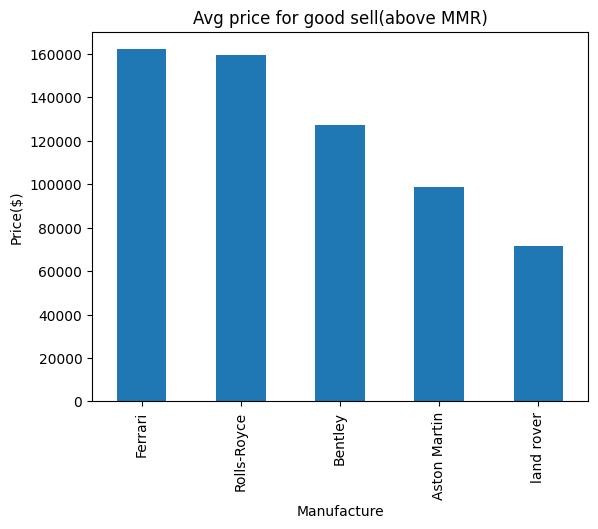

In [14]:
df_avg_sort['average_sell_price_per_car'].head(5).plot.bar(title='Avg price for good sell(above MMR)',ylabel='Price($)',xlabel='Manufacture')

(quantity) biggest amount of selling cars above the MMR price per manufacture

<Axes: title={'center': 'Amount selling cars of good sell(above MMR)'}, xlabel='Manufacture', ylabel='Amount'>

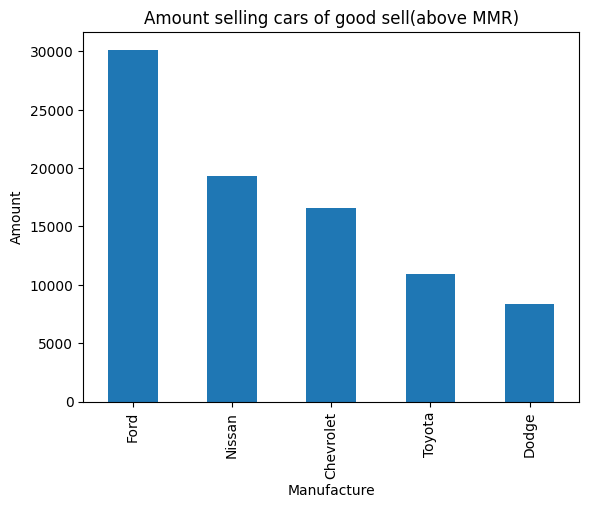

In [15]:
df_AboveMmr_sort['AboveMmr'].head(5).plot.bar(title='Amount selling cars of good sell(above MMR)',ylabel='Amount',xlabel='Manufacture')

checking the ford best selling models

<Axes: title={'center': 'Models selling amount'}, xlabel='Model', ylabel='Amount'>

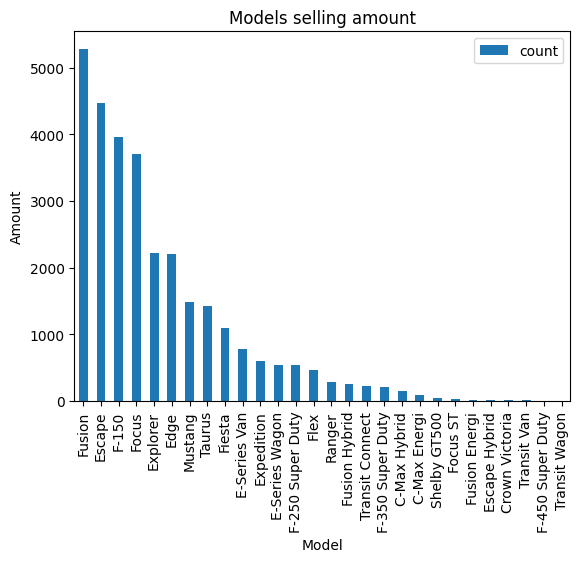

In [16]:
ford_df=dataAboveMmr.loc[dataAboveMmr['make']=="Ford"]
ford_df1=ford_df['model'].value_counts().to_frame()
ford_df1.plot.bar(xlabel='Model',ylabel='Amount',title='Models selling amount')

# linear regresion to predict the mmr price?

In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

# model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# For validation
from sklearn.model_selection import train_test_split

In [18]:
data=data.fillna(0)
data['year']=data['year'].astype(int)
data['condition']=data['condition'].astype(float)
data['odometer']=data['odometer'].astype(int)


In [19]:
ford_df2=data.loc[data['make']=="Ford"]


In [20]:
X = ford_df2[['sellingprice']]
y = ford_df2['mmr']

In [21]:
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (1-0)+0

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
mymodel = LinearRegression()

In [24]:
mymodel_fit = mymodel.fit(X_train,y_train)

In [25]:
y_prdict = mymodel_fit.predict(X_test)

In [26]:
ford_df2['mmr'].mean()

17818.079623881138

In [27]:
abs(y_test - y_prdict).mean()

1163.3370791745097

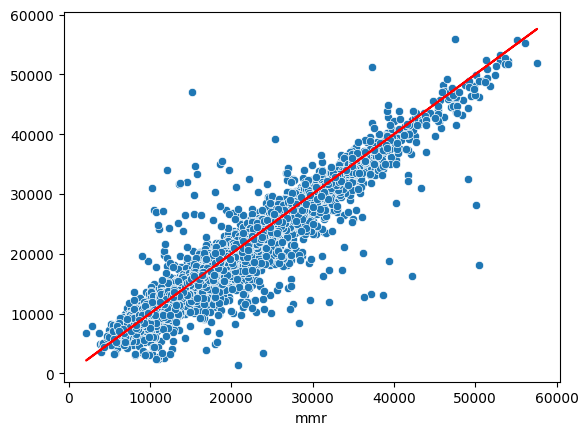

In [28]:
ax = sns.scatterplot(x=y_test, y=y_prdict)
ax.plot(y_test, y_test, 'r')